In [ ]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as tf_hub
from nltk.tokenize import word_tokenize
from tensorflow.keras.layers import TextVectorization
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape
from tensorflow.keras.callbacks import EarlyStopping
nltk.download('stopwords')
nltk.download('punkt')
!pip install pysastrawi
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from keras.layers import BatchNormalization
# nltk.download('stopwords')
# nltk.download('punkt')
# !pip install pysastrawi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
import requests

url_train = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_text.txt"
url_train_label = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_labels.txt"

url_val_text = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/val_text.txt"
url_val_labels = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/val_labels.txt"

url_test_text = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/test_text.txt"
url_test_labels = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/test_labels.txt"



train_data = requests.get(url_train)
trainlabel_data = requests.get(url_train_label)

val_data = requests.get(url_val_text)
vallabel_data = requests.get(url_val_labels)



test_data = requests.get(url_test_text)
testlabel_data = requests.get(url_test_labels)


train_data1 = train_data.text.split("\n")

train_data1_label = trainlabel_data.text.split("\n")

val_data1 = val_data.text.split("\n")
val_data1_label = vallabel_data.text.split("\n")


test_data1 = test_data.text.split("\n")
test_data1_label = testlabel_data.text.split("\n")


# for line in data:
# print(train_data1[:5])



In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Define stopwords for English
stopwords_en = set(stopwords.words('english'))

# Initialize Porter Stemmer
stemmer_en = PorterStemmer()

def text_preprocessing(text):
    # Case folding
    text = text.lower()

    # Mention removal
    text = re.sub("@[A-Za-z0-9_]+", " ", text)

    # Hashtags removal
    text = re.sub("#[A-Za-z0-9_]+", " ", text)

    # Newline removal (\n)
    text = re.sub(r"\\n", " ", text)

    # Whitespace removal
    text = text.strip()

    # URL removal
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"www.\S+", " ", text)

    # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc)
    text = re.sub("[^A-Za-z\s']", " ", text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords removal
    tokens = [word for word in tokens if word not in stopwords_en]

    # Stemming using Porter Stemmer
    tokens = [stemmer_en.stem(word) for word in tokens]

    # Remove 'th' characters
    tokens = [word.replace('th', '') for word in tokens]

    # Combining Tokens
    text = ' '.join(tokens)

    return text


In [ ]:
train_data_processning = [text_preprocessing(text) for text in train_data1]
for lin in train_data_processning[:3]:
  print(lin)
print('\n')
# for lin in text_preprocessing[:3]:
#   print(lin)

val_data_processning = [text_preprocessing(text) for text in val_data1]




qt origin draft  book remu lupin surviv battl hogwart
ben smi smi concuss remain lineup ursday curti
sorri bout stream last night crash tonight sure back minecraft pc tomorrow night




In [ ]:
test_data_processning = [text_preprocessing(text) for text in test_data1]



In [ ]:

for lin in train_data1[:5]:
  print(lin)

"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin" 
"Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ" 
Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night. 
Chase Headley's RBI double in the 8th inning off David Price snapped a Yankees streak of 33 consecutive scoreless innings against Blue Jays 
@user Alciato: Bee will invest 150 million in January, another 200 in the Summer and plans to bring Messi by 2017" 


In [ ]:


# Extracting text from training and test data
# X_train_texts = [sample[0] for sample in X_train]
# X_test_texts = [sample[0] for sample in X_test]

# Initialise the CountVectorizer and vectorise it.
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(train_data_processning)
X_test_vec = Vectorize.transform(val_data_processning)

# Finding the Number of Vocabs and Max Token Length in One Document
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in train_data_processning])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

# Text Vectorization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(train_data_processning)






Total Vocab :  27215
Maximum Sentence Length :  40 tokens


In [ ]:


# ## Document example
# print('Document example')
# print(df.text_processed[0])
# print('')

# ## Result of Text Vectorization
# print('Result of Text Vectorization')
# print(text_vectorization([df.text_processed[0]]))
# print('Vector size : ', text_vectorization([df.text_processed[0]]).shape)



## Document example
print('Document example')
print(train_data_processning[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
# Vectorise the first training data text
text_vectorized = text_vectorization([train_data_processning[0]])
print(text_vectorized)
print('Vector size : ', text_vectorized.shape)

val_vectorized = text_vectorization([val_data_processning[0]])

test_vectorized = text_vectorization([test_data_processning[0]])


Document example
qt origin draft  book remu lupin surviv battl hogwart

Result of Text Vectorization
tf.Tensor(
[[ 8910   919  1216   217  5936  6014  2008  1331 12093     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]], shape=(1, 40), dtype=int64)
Vector size :  (1, 40)


In [ ]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'u',
 's',
 'tomorrow',
 'may',
 'go',
 'c',
 'day',
 'nt',
 'st',
 'night',
 'see',
 'get',
 'friday',
 'time',
 'like',
 'sunday',
 'm',
 'saturday']

In [ ]:
train_data_processed = [sentence.split() for sentence in train_data_processning]
print(train_data_processed[:2])


[['qt', 'origin', 'draft', 'book', 'remu', 'lupin', 'surviv', 'battl', 'hogwart'], ['ben', 'smi', 'smi', 'concuss', 'remain', 'lineup', 'ursday', 'curti']]


In [ ]:
import gensim
from gensim.models import Word2Vec
# model = Word2Vec(train_data_processed, vector_size=100, window=5, min_count=3)

word2vec_model = Word2Vec(sentences=train_data_processed, vector_size=128, window=5, min_count=1, workers=4)
word2vec_model.train(train_data_processed, total_examples=len(train_data_processed), epochs=50)

(23904905, 26264550)

In [ ]:


tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data_processning)

# Convert text to sequence
X_train_seq = tokenizer.texts_to_sequences(train_data_processning)
X_val_seq = tokenizer.texts_to_sequences(val_data_processning)

X_test_seq = tokenizer.texts_to_sequences(test_data_processning)


# cleaning the invalide data
invalid_indices_train = [i for i, seq in enumerate(X_train_seq) if len(seq) == 0]
invalid_indices_val = [i for i, seq in enumerate(X_val_seq) if len(seq) == 0]

invalid_indices_test = [i for i, seq in enumerate(X_test_seq) if len(seq) == 0]




X_train_seq_clean = [seq for i, seq in enumerate(X_train_seq) if i not in invalid_indices_train]
y_train_ohe_clean = np.delete(train_data1_label, invalid_indices_train, axis=0)


X_val_seq_clean = [seq for i, seq in enumerate(X_val_seq) if i not in invalid_indices_val]
y_val_ohe_clean = np.delete(val_data1_label, invalid_indices_val, axis=0)


X_test_seq_clean = [seq for i, seq in enumerate(X_test_seq) if i not in invalid_indices_test]
y_test_ohe_clean = np.delete(test_data1_label, invalid_indices_test, axis=0)



# update index
max_seq_length = max(len(seq) for seq in X_train_seq_clean + X_val_seq_clean)
X_train_padded_clean = pad_sequences(X_train_seq_clean, maxlen=max_seq_length)
X_val_padded_clean = pad_sequences(X_val_seq_clean, maxlen=max_seq_length)


max_test_length = max(len(seq) for seq in X_test_seq_clean )
X_test_padded_clean = pad_sequences(X_test_seq_clean, maxlen=max_seq_length)



# update
y_train_ohe_clean = to_categorical(y_train_ohe_clean)
y_val_ohe_clean = to_categorical(y_val_ohe_clean)

y_test_ohe_clean = to_categorical(y_test_ohe_clean)


print("train data after cleaning:", len(X_train_seq_clean))
print("develop(val) data after cleaning:", len(X_val_seq_clean))
print("test(val) data after cleaning:", len(X_test_seq_clean))


train data after cleaning: 45614
develop(val) data after cleaning: 2000
test(val) data after cleaning: 12229


In [ ]:


# Get the pre-trained word embeddings
word_embeddings = word2vec_model.wv

# Get the embedding matrix
embedding_matrix = word_embeddings.vectors

# Get the vocabulary size
vocab_size = len(word_embeddings.key_to_index)

# Update the embedding layer in your neural network model
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=128,
                            weights=[embedding_matrix],
                            input_length=max_seq_length,
                            trainable=False)




In [ ]:
# Define the learning rate scheduler function



def learning_rate_scheduler(epoch: int) -> float:

    return 0.0001


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
def get_sentiment_score(line: list[str]) -> list[float]:
    """
    Get the sentiment score of the input text data.

    Args:
        line: list[str]: A line (list of str).

    Returns:
        list[float]: The compound score of 10 words in the sentence which has
        the most significant score (far from 0). If the sentence has less than
        10 words, the value of the remaining elements will be 0.
        After that, the score for the whole line is added to the list.
    """
    scores: list[float] = []
    analyzer = SentimentIntensityAnalyzer()
    for string in line:
        score = analyzer.polarity_scores(string)["compound"]
        scores.append(score)
    line_score = analyzer.polarity_scores(" ".join(line))["compound"]

    # Get the 10 most significant scores and add the line score
    if len(scores) > 10:
        scores.sort(key=lambda x: abs(x), reverse=True)
        result = scores[:10]
        result.append(line_score)
    else:
        result = scores
        result += [0] * (10 - len(scores))
        result.append(line_score)

    return result


In [ ]:
# Get the sentiment score of the text data
import nltk
nltk.download('vader_lexicon')

train_sentiment_score = np.array([get_sentiment_score(line) for line in train_data_processning])
val_sentiment_score = np.array([get_sentiment_score(line) for line in val_data_processning])
test_sentiment_score = np.array([get_sentiment_score(line) for line in test_data_processning])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:

invalid_indices_train = []
invalid_indices_val = []
invalid_indices_test = []


for i, text in enumerate(train_data_processning):
    if not text:
        invalid_indices_train.append(i)


train_data_processning = [text for i, text in enumerate(train_data_processning) if i not in invalid_indices_train]
train_data1_label = np.delete(train_data1_label, invalid_indices_train, axis=0)


invalid_indices_train = []


for i, text in enumerate(val_data_processning):
    if not text:
        invalid_indices_val.append(i)


val_data_processning = [text for i, text in enumerate(val_data_processning) if i not in invalid_indices_val]
val_data1_label = np.delete(val_data1_label, invalid_indices_val, axis=0)



for i, text in enumerate(test_data_processning):
    if not text:
        invalid_indices_test.append(i)


test_data_processning = [text for i, text in enumerate(test_data_processning) if i not in invalid_indices_test]
test_data1_label = np.delete(test_data1_label, invalid_indices_test, axis=0)


# Get the sentiment score of the text data
train_sentiment_score = np.array([get_sentiment_score(line) for line in train_data_processning])
val_sentiment_score = np.array([get_sentiment_score(line) for line in val_data_processning])
test_sentiment_score = np.array([get_sentiment_score(line) for line in test_data_processning])

# Vectorize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data_processning)

X_train_seq = tokenizer.texts_to_sequences(train_data_processning)
X_val_seq = tokenizer.texts_to_sequences(val_data_processning)
X_test_seq = tokenizer.texts_to_sequences(test_data_processning)

# Convert the sequences to padded sequences
max_seq_length = max(len(seq) for seq in X_train_seq + X_val_seq + X_test_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)

# Add the sentiment score as a feature
X_train_padded_with_sentiment = np.column_stack((X_train_padded, train_sentiment_score))
X_val_padded_with_sentiment = np.column_stack((X_val_padded, val_sentiment_score))
X_test_padded_with_sentiment = np.column_stack((X_test_padded, test_sentiment_score))


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data_processning)

X_train_seq = tokenizer.texts_to_sequences(train_data_processning)
X_val_seq = tokenizer.texts_to_sequences(val_data_processning)
X_test_seq = tokenizer.texts_to_sequences(test_data_processning)


max_seq_length = max(len(seq) for seq in X_train_seq + X_val_seq + X_test_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)


X_train_padded_with_sentiment = np.column_stack((X_train_padded, train_sentiment_score))
X_val_padded_with_sentiment = np.column_stack((X_val_padded, val_sentiment_score))
X_test_padded_with_sentiment = np.column_stack((X_test_padded, test_sentiment_score))


print("Train Feature Shape:", X_train_padded_with_sentiment.shape)
print("Validation Feature Shape:", X_val_padded_with_sentiment.shape)
print("Test Feature Shape:", X_test_padded_with_sentiment.shape)


Train Feature Shape: (45614, 43)
Validation Feature Shape: (2000, 43)
Test Feature Shape: (12264, 43)


Epoch 1/150
179/179 [==============================] - 13s 64ms/step - loss: 1.0614 - accuracy: 0.4192 - val_loss: 1.0301 - val_accuracy: 0.4345 - lr: 1.0000e-04
Epoch 2/150
179/179 [==============================] - 10s 55ms/step - loss: 1.0166 - accuracy: 0.4567 - val_loss: 1.0129 - val_accuracy: 0.4345 - lr: 1.0000e-04
Epoch 3/150
179/179 [==============================] - 9s 52ms/step - loss: 1.0072 - accuracy: 0.4617 - val_loss: 1.0075 - val_accuracy: 0.4350 - lr: 1.0000e-04
Epoch 4/150
179/179 [==============================] - 10s 53ms/step - loss: 1.0013 - accuracy: 0.4695 - val_loss: 1.0003 - val_accuracy: 0.4570 - lr: 1.0000e-04
Epoch 5/150
179/179 [==============================] - 9s 49ms/step - loss: 0.9909 - accuracy: 0.5040 - val_loss: 0.9894 - val_accuracy: 0.4920 - lr: 1.0000e-04
Epoch 6/150
179/179 [==============================] - 9s 48ms/step - loss: 0.9748 - accuracy: 0.5422 - val_loss: 0.9715 - val_accuracy: 0.5715 - lr: 1.0000e-04
Epoch 7/150
179/179 [==========

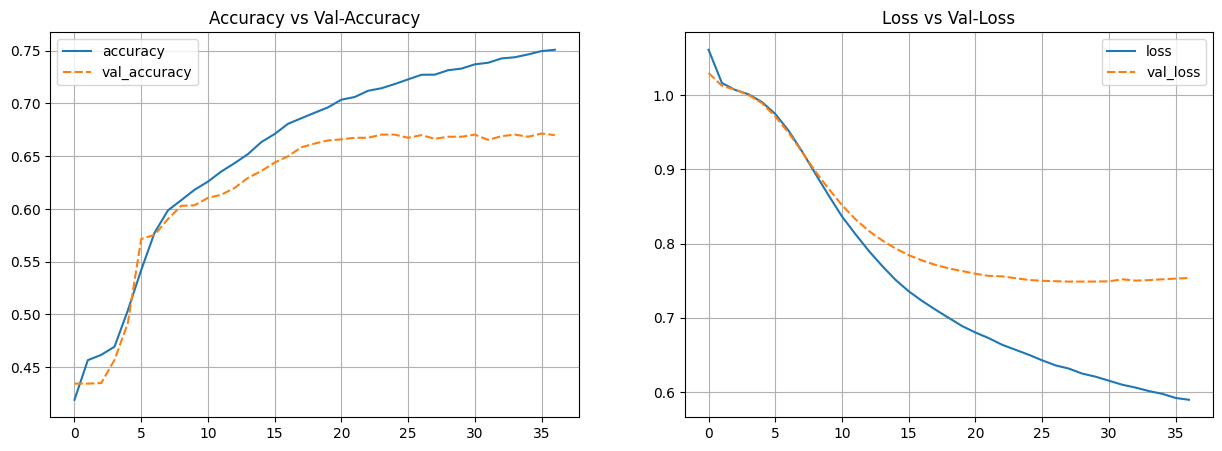

In [21]:

sche = learning_rate_scheduler
rate_scheduler = tf.keras.callbacks.LearningRateScheduler(sche)
embedding_dim = 100

# Define the input shape of the embedding layer
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the input shape of the embedding layer
input_length = 43  # Set the input length to match your sequence length

# Define the embedding layer with the adjusted input shape
embedding_layer = tf.keras.layers.Embedding(
    input_dim=vocab_size,  # Assuming you have defined vocab_size
    output_dim=embedding_dim,  # Assuming you have defined embedding_dim
    input_length=input_length  # Adjusted input length
)

# Define the model
model_nn = tf.keras.models.Sequential([
    embedding_layer,
    tf.keras.layers.GlobalAveragePooling1D(),  # Global average pooling layer
    tf.keras.layers.Dense(64, activation='relu'),  # Fully connected layer
    tf.keras.layers.Dropout(0.2),  # Dropout layer
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer
])

# Compile the model
model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=9, mode="min", verbose=1
)
rate_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

# Fit the model
batch_size = 256
model_nn_hist = model_nn.fit(
    X_train_padded_with_sentiment, y_train_ohe_clean,
    epochs=150,
    batch_size=batch_size,
    validation_data=(X_val_padded_with_sentiment, y_val_ohe_clean),
    callbacks=[early_stopping, rate_scheduler]
)

# Plot training results
model_nn_hist_df = pd.DataFrame(model_nn_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_nn_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_nn_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()



In [22]:
# best_model_index = model_lstm_1_hist_df['val_accuracy'].idxmax()
# best_model = model_lstm_1_hist_df.iloc[best_model_index]
# print("Best Model Epoch:", best_model_index + 1)
# print("Validation Accuracy:", best_model['val_accuracy'])
# print("Validation Loss:", best_model['val_loss'])

# # the best model information
# print("\nBest Model Summary:")
# best_model_summary = model_lstm_1.to_json()
# print(best_model_summary)
# # saving

# # best_model.save("best_model_lstm_1.h5")

# model_lstm_1.save("/content/best_model_lstm_1.h5")

# Choose the best model based on validation accuracy
best_model_index = model_nn_hist_df['val_accuracy'].idxmax()
best_model = model_nn_hist_df.iloc[best_model_index]
print("Best Model Epoch:", best_model_index + 1)
print("Validation Accuracy:", best_model['val_accuracy'])
print("Validation Loss:", best_model['val_loss'])

# Get the best model architecture
best_model_summary = model_nn.to_json()
print("\nBest Model Summary:")
print(best_model_summary)

# Save the best model
best_model_path = "/content/best_model_nn.h5"
model_nn.save(best_model_path)
print("Best model saved to:", best_model_path)


Best Model Epoch: 36
Validation Accuracy: 0.671500027179718
Validation Loss: 0.7528921365737915

Best Model Summary:
{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 43], "dtype": "float32", "sparse": false, "ragged": false, "name": "embedding_2_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Embedding", "config": {"name": "embedding_2", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 43], "input_dim": 27764, "output_dim": 100, "embeddings_initializer": {"module": "keras.initializers", "class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}, "registered_name": null}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": 43}, "registered_name": null, "build_config": {"input_shape": [null, 43]}}, {"module": "keras.la

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from keras.models import load_model
from keras.utils import to_categorical

# Load the best neural network model
best_model_nn = load_model("/content/best_model_nn.h5")

# Convert test labels to one-hot encoding
y_test_ohe = to_categorical(test_data1_label)

# Evaluate the model on the test data
test_loss, test_accuracy = best_model_nn.evaluate(X_test_padded_with_sentiment, y_test_ohe, verbose=1)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


384/384 [==============================] - 2s 4ms/step - loss: 0.8772 - accuracy: 0.6018
Test Accuracy: 0.6017612814903259
